In [2]:
#######################################################################
# Loading data
#######################################################################
using MatrixNetworks
using Distributions
using Gadfly
using Clustering
using NPZ
using BenchmarkTools, Compat
using DelimitedFiles
using SparseArrays
using Printf
using LinearAlgebra

community0 = readdlm("Data/LFRBenchmarks/LFR3/community.dat");
adj = readdlm("Data/LFRBenchmarks/LFR3/network.dat");

community_true = community0[:,2];
N = length(community_true);
n_edge2 = size(adj)[1];

A = sparse(adj[:,1],adj[:,2],vec(ones(Int64,n_edge2,1)),N,N);
A,~ = largest_component(A);
adj = 0;
#######################################################################

0

In [3]:
#######################################################################
# First call to compile the functions
#######################################################################
print("------------ First Run for Compilation ------------- \n")

include("Algo/SphereEmbedCluster.jl")

n_it_PPM = 2;
t = 1e-06;
n_clusters = 2;
n_it_Vec_Partition = 3;
shape = "Ellipsoidal"; #shape = "Spherical"
r0 = 20;

n_updates = 1;
sig,community =  SphereEmbedCluster(A,n_it_PPM,t, n_clusters,n_it_Vec_Partition,n_updates,shape,r0);

	print("\n------------ DONE: TEST OK ------------- \n")
#######################################################################

------------ First Run for Compilation ------------- 



 ------- Acc Projected Power Iteration -------
The iteration did not converge after 2 iterations


The relative difference between the last objective values 0.013673 
  0.230599 seconds (186.98 k allocations: 17.207 MiB, 96.11% compilation time)


OK 
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20


Number of updates: 0
Number of communities: 2
Modularity: 0.16824295487132201
 -------------------------------------------- 
The squared singular values divided by N : 


[0.8585801767816785, 0.017925753144541028, 0.015387410983276457, 0.011323470337468873, 0.009711533568858198, 0.008547469766460333, 0.008215314822312166, 0.007622579996981026, 0.007289893204617955, 0.006928270231116135, 0.006096763973984003, 0.005747219709063336, 0.005393613152394218, 0.005171095691654412, 0.004762742604538277, 0.004722398724001046, 0.004482173538348864, 0.0043814796447942, 0.003944081500389096, 0.0037665586235219348]

------------ DONE: TEST OK ------------- 


In [4]:
#######################################################################
# Second call to compute the embedding and the best partition
#######################################################################
print("------------ Complete calculation ------------- \n")

n_it_PPM = 30000;
t = 1e-8;
r0 = 40;

n_clusters = 10;

# Specify here the number of times vector partition is repeated
n_it_Vec_Partition = 1;
# we advise : n_it_Vec_Partition = 100;

n_updates = 100; # by default
shape = "Ellipsoidal"; #shape = "Spherical"

community = zeros(Int64,N,1);
sig,community =  @time SphereEmbedCluster(A,n_it_PPM,t, n_clusters,n_it_Vec_Partition,n_updates,shape,r0)

print("\n------------ DONE ------------- \n")
#######################################################################

------------ Complete calculation ------------- 



 ------- Acc Projected Power Iteration -------
The iteration has become stationary after 90 iterations


  1.370725 seconds (2.39 k allocations: 494.162 MiB, 9.92% gc time)
OK 
 -------------- Clustering ------- 
dimension of embedding used for clustering: 40
Number of updates: 

7
Number of communities: 6
Modularity: 0.54021581525463
 -------------------------------------------- 
The squared singular values divided by N : 
[0.45623479297989666, 0.3903319555400842, 0.15340062362443888, 3.2607853816794855e-5, 6.0712012042867674e-9, 2.1536792917918303e-9, 1.5725845607235308e-9, 1.4827701576299749e-9, 1.0325214387176346e-9, 9.909888394665034e-10, 9.135271114863755e-10, 8.164716504132733e-10, 6.423530936908172e-10, 5.55555105089029e-10, 4.992986854740177e-10, 4.0764463228283444e-10, 3.472393442823594e-10, 3.2757305287131056e-10, 2.712113258758291e-10, 2.457187743387322e-10, 2.2683063528856797e-10, 1.9145199848273676e-10, 1.5745355200292888e-10, 1.5191702433422436e-10, 1.1984367006297454e-10, 1.1830686259165457e-10, 1.0015549382833272e-10, 9.417433458673726e-11, 7.654741809121979e-11, 7.070012366866574e-11, 5.837542825891195e-11, 5.614264539781837e-11, 5.0583989383579086e-11, 4.2861124135114e-11, 3.73671469758659e-11, 3.303626054878899e-11, 2.98405768003046e-11, 2.2

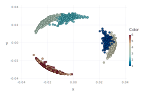

In [5]:
#######################################################################
# Plotting
#######################################################################
# The effetive dimension is 3
# One 2D-projection
plot(x=sig[1,:],y=sig[2,:], color = community)
# the colors are the retreived communities

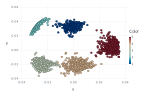

In [13]:
#######################################################################
# Plotting
#######################################################################
# another 2D-projection
plot(x=sig[2,:],y=sig[3,:], color = community)